In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the csv file and displaying the top 5 entries 
data = pd.read_csv(r"D:\Python\Python Data sets\Boat Rockerz.csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [3]:
#This tell about no.of rows and columns present in dataset.
data.shape

(9976, 2)

In [4]:
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [5]:
#The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
data.describe

<bound method NDFrame.describe of                                                  review  rating
0     It was nice produt. I like it's design a lot. ...       5
1     awesome sound....very pretty to see this nd th...       5
2     awesome sound quality. pros 7-8 hrs of battery...       4
3     I think it is such a good product not only as ...       5
4     awesome bass sound quality very good bettary l...       5
...                                                 ...     ...
9971                                      GoodREAD MORE       5
9972  Everything is amazimg but the built is very li...       5
9973                                      GoodREAD MORE       5
9974       Best headphone i have ever used....READ MORE       5
9975                                      NiceREAD MORE       5

[9976 rows x 2 columns]>

In [6]:
#Display the top 5 entries of the review column 
data.review.head()

0    It was nice produt. I like it's design a lot. ...
1    awesome sound....very pretty to see this nd th...
2    awesome sound quality. pros 7-8 hrs of battery...
3    I think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
Name: review, dtype: object

In [8]:
#TextBlob is alibrary for processing textual data. It provides a simple API for diving into common natural language processing (NLP) 
#tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
! pip install textblob

In [9]:
#import library to remove stopwords
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [10]:
data['review'] = data['review'].str.replace('[^\w\s]', "")
data.review.head(5)

0    it was nice produt i like its design a lot its...
1    awesome soundvery pretty to see this nd the so...
2    awesome sound quality pros 78 hrs of battery l...
3    i think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
Name: review, dtype: object

In [11]:
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
data.review.head()

0    nice produt like design lot easy carry looked ...
1    awesome soundvery pretty see nd sound quality ...
2    awesome sound quality pros 78 hrs battery life...
3    think good product per quality also design qui...
4    awesome bass sound quality good bettary long l...
Name: review, dtype: object

In [13]:
#WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more.
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [14]:
data['review'] = data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.review.head()

0    nice produt like design lot easy carry looked ...
1    awesome soundvery pretty see nd sound quality ...
2    awesome sound quality pro 78 hr battery life i...
3    think good product per quality also design qui...
4    awesome bass sound quality good bettary long l...
Name: review, dtype: object

In [15]:
! pip install wordcloud

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [17]:
data.columns

Index(['review', 'rating'], dtype='object')

In [18]:
#count of reviews w.r.t ratings.
data.rating.value_counts()

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

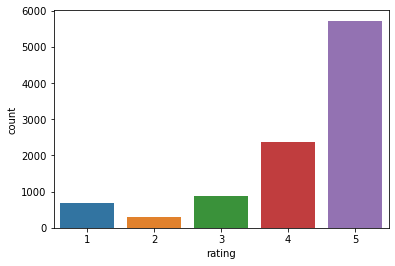

In [19]:
#EDA
import seaborn as sns
sns.countplot(data = data, x = 'rating')

In [21]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = data
# Dropping null values
reviews.dropna(inplace=True)

In [22]:
score_1 = reviews[reviews['rating'] == 1]
score_2 = reviews[reviews['rating'] == 2]
score_3 = reviews[reviews['rating'] == 3]
score_4 = reviews[reviews['rating'] == 4]
score_5 = reviews[reviews['rating'] == 5]

In [23]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

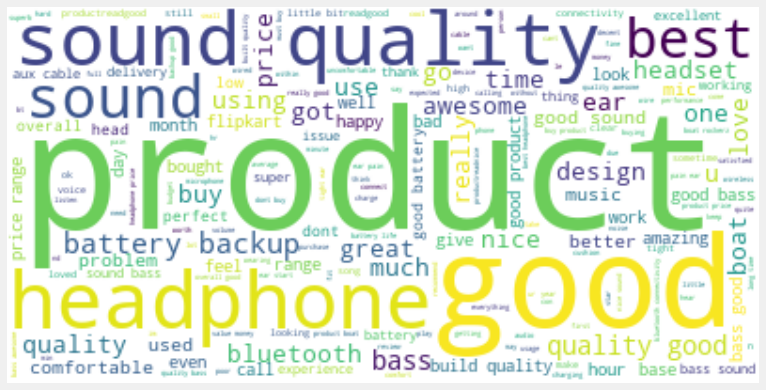

In [62]:
#Wordcloud function's input needs to be a single string of text.
#Concatenating all Summaries into a single string.
#Similarly you can build for Text column
reviews_str = reviews_sample.review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['rating'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.review.str.cat()
positive_reviews_str = positive_reviews.review.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Ratings')

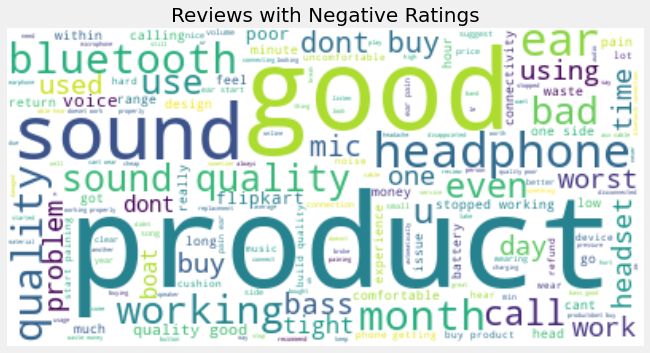

In [57]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Ratings',fontsize=20)

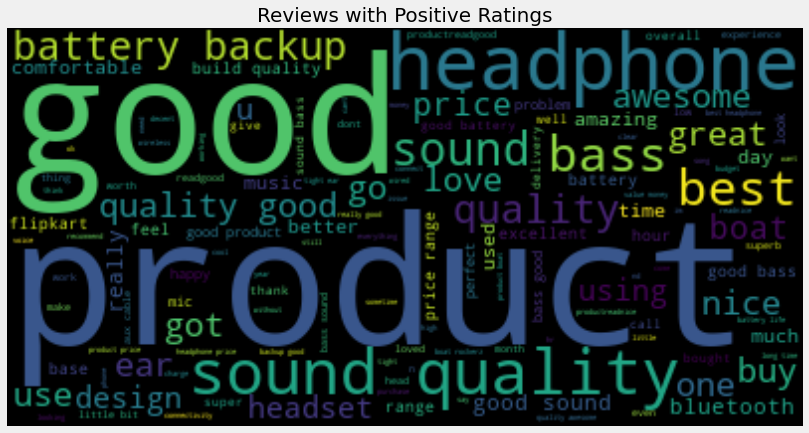

In [41]:
fig = plt.figure(figsize=(15,15))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Ratings',fontsize=20)
plt.show()

In [31]:
!pip install vaderSentiment

In [32]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [35]:
# Generating sentiment for all the reviews present in the dataset
emptyline=[]
for row in data['review']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
data_sentiments=pd.DataFrame(emptyline)
data_sentiments.head()

,neg,neu,pos,compound
0,0.0,0.423,0.577,0.8020
1,0.0,0.349,0.651,0.9501
2,0.0,0.725,0.275,0.9440
3,0.0,0.502,0.498,0.9712
4,0.0,0.501,0.499,0.8992


In [37]:
# Merging the sentiments back to reviews dataframe
data_merged = pd.concat([data.reset_index(drop=True), data_sentiments], axis=1)
data_merged.head(6)

,review,rating,neg,neu,pos,compound
0,nice produt like design lot easy carry looked ...,5,0.000,0.423,0.577,0.8020
1,awesome soundvery pretty see nd sound quality ...,5,0.000,0.349,0.651,0.9501
2,awesome sound quality pro 78 hr battery life i...,4,0.000,0.725,0.275,0.9440
3,think good product per quality also design qui...,5,0.000,0.502,0.498,0.9712
4,awesome bass sound quality good bettary long l...,5,0.000,0.501,0.499,0.8992
5,awsome sound powerful bass battery backup also...,5,0.031,0.455,0.515,0.9884


In [38]:
# Convert ratings into positive and negetive sentiments using some threshold
data_merged['Sentiment'] = np.where(data_merged['compound'] >= 0 , 'Positive','Negative')
data_merged.head(8)

,review,rating,neg,neu,pos,compound,Sentiment
0,nice produt like design lot easy carry looked ...,5,0.000,0.423,0.577,0.8020,Positive
1,awesome soundvery pretty see nd sound quality ...,5,0.000,0.349,0.651,0.9501,Positive
2,awesome sound quality pro 78 hr battery life i...,4,0.000,0.725,0.275,0.9440,Positive
3,think good product per quality also design qui...,5,0.000,0.502,0.498,0.9712,Positive
4,awesome bass sound quality good bettary long l...,5,0.000,0.501,0.499,0.8992,Positive
5,awsome sound powerful bass battery backup also...,5,0.031,0.455,0.515,0.9884,Positive
6,product sound clear excellent bass obviously g...,4,0.000,0.392,0.608,0.9381,Positive
7,u buy thispros1 sound quality build quality aw...,4,0.053,0.790,0.156,0.6597,Positive


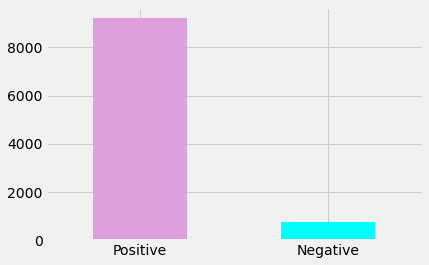

In [39]:
Result=data_merged['Sentiment'].value_counts()
Result.plot(kind='bar', rot=0, color=['plum','cyan']);